In [11]:
'''
Dataset
Build a model
Define loss_fn & optimizer
Define trainer(model produces predition -> compute the loss (label - pred) -> backprop)
Define test (on validation) -> training/validation/test
Run trainer and test
'''

'\nDataset\nBuild a model\nDefine loss_fn & optimizer\nDefine trainer(model produces predition -> compute the loss (label - pred) -> backprop)\nDefine test (on validation) -> training/validation/test\nRun trainer and test\n'

In [12]:
import torch
from torch.utils.data import DataLoader
from torch.utils.data import TensorDataset
from torchvision.datasets import MNIST
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt



In [13]:
train_ds = MNIST(root='data', train = True, download=True, transform=ToTensor())
valid_ds = MNIST(root='data', train = False, download=True, transform=ToTensor())

5


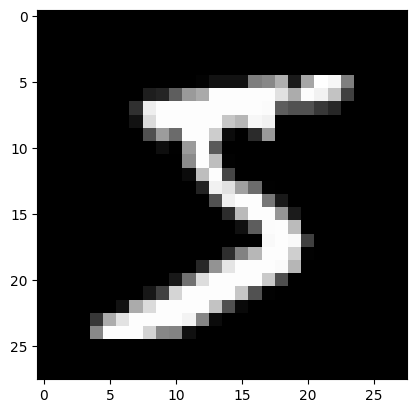

In [14]:
# Examine the data
image, label = train_ds[0]
print(label)
plt.imshow(image.float().reshape((28,28)), cmap='gray')


In [15]:
# create a dataloader
# Makes it easy to iterate over batches
# GPU acceleration -> num_workers = 4, pin_memory (pinned memory -> faster RAM to GPU transfer)
bs = 64
train_dl = DataLoader(train_ds, batch_size = bs , shuffle = True)
valid_dl = DataLoader(valid_ds, batch_size = bs , shuffle = True)

7


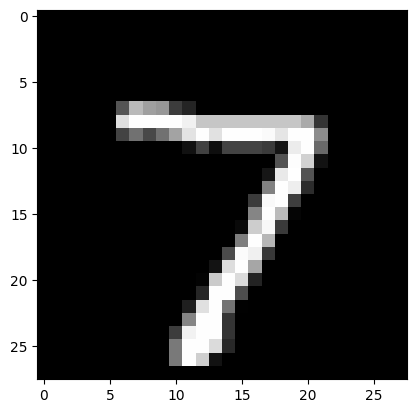

In [28]:
# Examine the data
image, label = valid_ds[0]
print(label)
plt.imshow(image.float().reshape((28,28)), cmap='gray')

In [29]:
from torch import nn

#build a model
class MNISTModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.lin = nn.Linear(784,10)
        # self.lin2 = nn.Linear(64,32)
        # self.lin3 = nn.Linear(32,10)


    def forward (self, xb):
        xb = xb.flatten(1,-1) # (bs,1,28,28) -> bs, 784
        return self.lin(xb)

In [30]:
#init model
model = MNISTModel()
print(model)


MNISTModel(
  (lin): Linear(in_features=784, out_features=10, bias=True)
)


In [31]:
from torch import optim

lr = 0.5

#define a loss func and optimizer
loss_func = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=lr)

def accuracy_func(pred, yb):
    pred_class = torch.argmax(pred, dim=1)
    return (pred_class == yb).float().mean()

In [32]:
# Define a Trainer

def train(dataloader, model, loss_func, optimizer):
    for batch_idx, (xb, yb) in enumerate(dataloader):
        # loss 
        pred = model(xb)
        loss = loss_func(pred, yb)
        
        #backprop
        loss.backward() # autograd
        optimizer.step() # updates the parameters using the optimizer(SGD/Adam)
        optimizer.zero_grad()
        
        #logging
        if batch_idx % 100 == 0:
            train_loss, train_accuracy = loss.item(),accuracy_func(pred, yb).item() * 100
            print(f'Loss: {train_loss:6f} Accuracy: {train_accuracy:0.1f}%')




In [33]:
# Define test -> not updating any parameters
def test(dataloader, model, loss_func):
    model.eval() # flag to make sure things like dropout works as expected in testing
    with torch.no_grad():
        for xb,yb in dataloader:
            pred = model(xb)
            loss = loss_func(pred, yb)
            accuracy = accuracy_func(pred, yb)

            # logging
            test_loss, test_accuracy = loss.item(), accuracy.item() * 100

    print(f'Test:\n Loss: {test_loss:6f} Accuracy: {test_accuracy:0.1f}%')



In [34]:
#run
epochs = 2
for t in range(epochs):
    print(f'\n Epoch {t} \n-----------')
    train(train_dl, model, loss_func, optimizer)
    test(valid_dl,model,loss_func)

print("Finished ")


 Epoch 0 
-----------
Loss: 2.267995 Accuracy: 20.3%
Loss: 0.508539 Accuracy: 79.7%
Loss: 0.302501 Accuracy: 92.2%
Loss: 0.468367 Accuracy: 87.5%
Loss: 0.157952 Accuracy: 96.9%
Loss: 0.475540 Accuracy: 85.9%
Loss: 0.542118 Accuracy: 78.1%
Loss: 0.372756 Accuracy: 89.1%
Loss: 0.475810 Accuracy: 89.1%
Loss: 0.385605 Accuracy: 87.5%
Test:
 Loss: 0.175832 Accuracy: 87.5%

 Epoch 1 
-----------
Loss: 0.452135 Accuracy: 89.1%
Loss: 0.344112 Accuracy: 87.5%
Loss: 0.370039 Accuracy: 87.5%
Loss: 0.572588 Accuracy: 90.6%
Loss: 0.351567 Accuracy: 89.1%
Loss: 0.226835 Accuracy: 93.8%
Loss: 0.108987 Accuracy: 98.4%
Loss: 0.505393 Accuracy: 89.1%
Loss: 0.255202 Accuracy: 93.8%
Loss: 0.188600 Accuracy: 92.2%
Test:
 Loss: 0.163442 Accuracy: 93.8%
Finished 
